In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%%writefile agent.py 


from dotenv import load_dotenv
load_dotenv()

# A simple test graph
from langgraph.graph import StateGraph, START, END


from states import State
from webnode import web_search_node
from summarizer import summarizer_node

graph_builder = StateGraph(State)

graph_builder.add_node("web_search", web_search_node)
graph_builder.add_node("summarize", summarizer_node)

graph_builder.add_edge(START, "web_search")
graph_builder.add_edge("web_search","summarize")
graph_builder.add_edge("summarize", END)
graph = graph_builder.compile() 


Overwriting agent.py


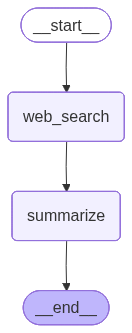

In [3]:
from IPython.display import Image, display

from agent import graph

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [4]:
state = {'question': 'Ajit Kumar Shiv Nadar University'}

state = graph.invoke(state)

state

{'question': 'Ajit Kumar Shiv Nadar University',
 'search_results': 'Title:Ajit Kumar - Shiv Nadar University\nURL:https://snu.edu.in/faculty/ajit-kumar/\nContent: Image 1: Shiv Nadar University Logo Image 2 Image 3 *   Admissions *   Programs *   Schools and Centers *   Department of Civil Engineering *   Department of Mechanical Engineering *   Department of Computer Science and Engineering *   Department of Chemical Engineering *   Department of Electrical Engineering *   Department of Chemistry *   Department of Life Sciences *   Department of Mathematics *   Department of Physics *   Department of Design *   Department of Economics *   Department of English *   Department of International Relations and Governance Studies *   Department of Sociology *   Department of Rural Management Image 6: Ajit Kumar Your Admission Assistant. *   Programs *   Admissions *   Schools and Centers *   Student Handbook *   Admission Blogs *   Parent Handbook *   For UG Admissions 1800-102-1768\n\nTit